# Systemy uczące się - problem przeuczenia

## Zadanie 1
Rozważamy długą serię rzutów monetą z dwoma równie prawdopodobnymi wynikami: orzeł (1) i reszka (0). Zadanie rozpocznij od wygenerowania takiej serii np. 1000-elementowej, z której potem będziesz konstruował zbiór uczący.

Konstruujemy klasyfikator, który próbuje przewidzieć wynik rzutu monetą na podstawie wyników poprzedzających rzutów. Na przykład będziemy konstruować klasyfikator odpowiadający na pytanie ,,jaki będzie wynik kolejnego rzutu monetą jeśli teraz wypadła mi reszka?'' albo klasyfikator ,,jaki będzie wynik kolejnego rzutu monetą jeśli poprzednio dwa razy wypadły mi dwa orły?''. Oblicz trafność takiego klasyfikatora.

W kolejnych iteracjach zwiększaj liczbę poprzednich rzutów, których użyjesz jako cechy klasyfikatora (na początku przewidujesz za pomocą ostatniego rzutu, potem dwóch ostatnich, trzech ostatnich, itd.) i narysuj wykres trafności w zależności od liczby cech (poprzednich rzutów). Jak zmienia się wynik predykcji na zbiorze uczącym?

Możesz wykorzystać klasyfikator `KNeighborsClassifier` z domyślnymi ustawieniami, a do oceny trafności wykorzystaj funkcję `accuracy_score(y_true, t_pred)` gdzie `y_true` to wektor prawidłowych wartości klasy decyzyjnej, a `y_pred` to wektor wartości przewidzianych przez klasyfikator. Obiekt klasyfikatora w pakiecie sklearn można wytrenować wywołując `model.fit(macierz_cech,wektor_klas)` i wykonać predykcję poprzez `model.predict(macierz_cech)`. Seria rzutów monetą niech będzie mieć długość co najmniej 1000, a w testach uwzględnij zbiory od jednej do 20 cech.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%matplotlib inline

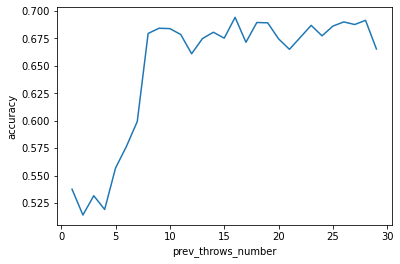

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def seq_to_dataset(seq, k):
    """
    Funkcja zamienia sekwencję 0/1 seq w zbiór danych do treningu klasyfikatora.
    Zwraca macierz cech X oraz wektor klas y
    Parametr k to liczba cech (czyli liczba poprzednich elementów sekwencji użytych do predykcji kolejnej)
    """
    X = np.array([seq[(i - k):i] for i in range(k, len(seq))])
    y = np.array([seq[i] for i in range(k, len(seq))])
    return X, y



sequence = (np.random.rand(1000) > 0.5).astype(int)
prev_throws_number = range(1, 30)
accuracy = []

for i in prev_throws_number:
    X,y = seq_to_dataset(sequence,i)   
    classifier = KNeighborsClassifier()
    classifier.fit(X, y)
    accuracy.append(accuracy_score(y, classifier.predict(X)))

plt.plot(prev_throws_number, accuracy)
plt.xlabel('prev_throws_number')
plt.ylabel('accuracy')
plt.show()

In [3]:
sequence = (np.random.rand(1000) > 0.5).astype(int)
assert seq_to_dataset(sequence, 5)[0].shape == (995, 5)
#Tutaj będą dodatkowe testy

Jak widzisz dodawanie kolejnych cech poprawia wynik na zbiorze uczącym, ale co dzieje się z wynikami na zbiorze testowym?

*Wskazówka*: Ponieważ dane generujemy sztucznie, po prostu można wylosować kolejny zbiór (ma on przecież taki sam rozkład)

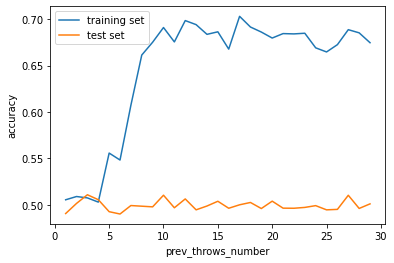

In [4]:
test_accuracy = []
training_accuracy = []
test_sequence = (np.random.rand(5000) > 0.5).astype(int)
for i in prev_throws_number:
    X_train, y_train = seq_to_dataset(sequence, i)
    X_test, y_test = seq_to_dataset(test_sequence, i)
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    training_accuracy.append(accuracy_score(y_train, classifier.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, classifier.predict(X_test)))
plt.plot(prev_throws_number, training_accuracy, label='training set')
plt.plot(prev_throws_number, test_accuracy, label='test set')
plt.xlabel('prev_throws_number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Nasze dane pochodzą ze zwykłego podrzucania zrównoważoną monetą, więc wynik każdego kolejnego rzutu jest całkowicie losowy i niezależy od poprzednich rzutów. Mając to na uwadze wiemy, że nie można przewidzieć kolejnego wyniku rzutu monetą w żaden sposób, niezależnie od wybranych cech. Nie dziwi więc fakt, że wynik na zbiorze testowym zawsze oscyluje wokół 0.5. Wynik ten jest dobrym przybliżeniem ,,prawdziwego'' błędu klasyfikatora czyli błędu popełnianego przez niego na populacji wszystkich możliwych przykładów. (Bardziej konkretnie jest to wartość oczekiwana czyli błąd na przykładzie ważony prawdopodobieństwem jego pojawienia się w zbiorze testowym/uczącym/populacji). 

Zwróć uwagę, że pracując w firmie nad etapem tzw. inżynierii cech czyli konstrukcji kolejnych cech dla poprawy jakości predykcji, wydawałoby ci się że poprawiasz wynik gdybyś obserwował tylko wyniki na zbiorze uczącym.

## Zadanie 2
Wygenerowano dane poprzez jednorodnie losowanie cechy oraz wyznaczenie zmiennej decyzyjnej poprzez zastosowanie pewnej nielinowej funkcji oraz dodanie białego szumu.

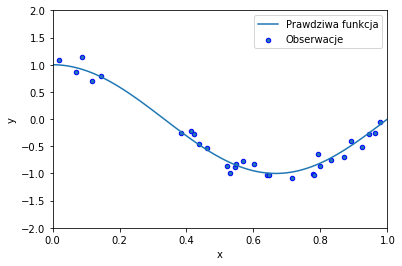

In [5]:
X, y =get_data()
plot_poly(X,y)

Wytrenuj regresję liniową na tych danych. Zasady korzystania z obiektu `LinearRegression` są identyczne jak dla klasyfikacji np. k-NN. Następnie zwizualizuj wynik uczenia poprzez wywołanie pomocniczej funkcji `plot_poly(X, y, regressor)` która oprócz danych może też przyjąć wytrenowany obiekt regresji liniowej.

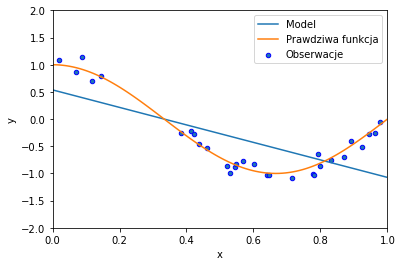

In [6]:
from sklearn.linear_model import LinearRegression

linearRegressor = LinearRegression()
linearRegressor.fit(X, y)
plot_poly(X, y, linearRegressor)

Jak widać na wykresie sama regresja liniowa jest niewystarczająca, aby zamodelować tę funkcję. Wykonajmy więc etap inżynierii cech tj. stwórzmy takie cechy, aby regresja liniowa była w stanie się czegoś takiego nauczyć. Obserwując wykres funkcji widzimy, że przydałoby się dodać do zbioru cech cechę $x^2$ aby móc zamodelować wygięcie funkcji. Nie musimy takiej cechy tworzyć ręcznie ponieważ w pakiecie `sklearn` istnieje gotowy obiekt `PolynomialFeatures` takie cechy tworzące. Przyjrzyj się jego użyciu poniżej.

In [7]:
from sklearn.preprocessing import PolynomialFeatures

sample = np.array([0,1,2,3,4]).reshape(-1,1)
print(sample)

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
sample2 = polynomial_features.fit_transform(sample)
print(2, sample2)

polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
sample3 = polynomial_features.fit_transform(sample)
print(3, sample3)

[[0]
 [1]
 [2]
 [3]
 [4]]
2 [[ 0.  0.]
 [ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]
3 [[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  4.  8.]
 [ 3.  9. 27.]
 [ 4. 16. 64.]]


Wykorzystaj ten obiekt, aby dodać cechę kwadratową do naszej regresji. UWAGA: rezultatem twojego kodu powinna być wytrenowana regresja, ale rysowanie wykresu funkcją `plot_poly` zwróci błąd - o czym za chwilę.

In [8]:
# YOUR CODE HERE
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_2 = polynomial_features.fit_transform(X)
linearRegressor = LinearRegression()
linearRegressor.fit(X_2, y)

LinearRegression()

Funkcja rysująca wykres nie jest już w stanie narysować wykresu naszego modelu z bardzo prostego powodu: rysuje ona wykresy 2D podczas gdy do narysowania Twojego modelu należy zastosować wykres 3D (dlaczego?). Tak stworzony model rodzi też inną trudność: przykłady testowe należy poddać takiemu samemu przetworzeniu. W środowisku produkcyjnym także należałoby to zawsze robić. Teraz nie jest to duży problem, ale można sobie wyobrazić, że prawdziwy projekt takich dodatkowych tricków miałby znacznie więcej... 

Dość użyteczne byłoby zaszycie tworzenia dodatkowych cech w samym klasyfikatorze co umożliwia nam obiekt `Pipeline` z bibliotki `sklearn`. `Pipeline` umożliwia nam stworzenie obiektu-klasyfikatora poprzez podanie listy kolejnych operacji które należy zaaplikować.

```
pipeline = Pipeline([("nazwa_operacja1", obiekt1), ("nazwa_operacja2", obiekt2)])
```
na takim obiekcie możemy potem w zwykły sposób wywołać `pipeline.fit()` czy `pipeline.predict()`, a dane automatycznie przejdą przez wszystkie trasformacje. Przepisz swój kod, łącząc operacje w pipeline - teraz rysowanie powinno się udać!

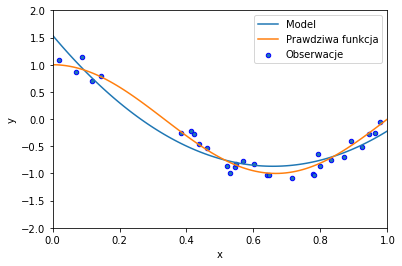

In [9]:
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

def create_pipeline(X, y, degree, norm=False):
    pipeline = Pipeline([("quadratic_feature", PolynomialFeatures(degree=degree, include_bias=False)),
                        ("linear_regression", LinearRegression(normalize=norm))])
    pipeline.fit(X, y)
    return pipeline
pipeline = create_pipeline(X, y, 2)
plot_poly(X, y, pipeline)

Jest trochę lepiej, ale może być jeszcze lepiej poprzez dodanie jeszcze większej liczby cech. Dopisz pętlę, która wygeneruje wykresy dla oryginalnego zbioru danych, zbioru z cechami stopnia 4 i stopnia 15.

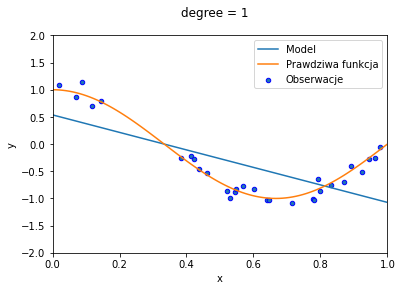

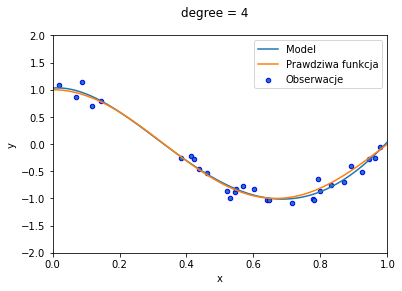

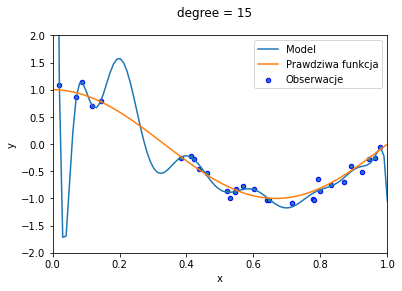

In [10]:
# YOUR CODE HERE
for i in [1, 4, 15]:
    plt.subplots()
    plt.suptitle(f"degree = {i}")
    plot_poly(X, y, create_pipeline(X, y, i))

**Ćwiczenia**
- Jak będzie się zmieniał błąd uczący dla kolejnych, coraz to bardziej ekspresyjnych regresji?
- Jak będzie się zmieniał błąd testowy?
- Dlaczego pojawia się tak rozbieżność? W odpowiedzi postaraj się odwołać do dekompozycji wariancja-obciążenie.
- Czy powyższe zależności odnoszą się do innych modeli uczenia maszynowego, gdyby parametr "stopień wielomianu" zastąpić "złożonością modelu"? Odnieś się do poprzednio poznawanych klasyfikatorów.
- Czy potrafisz przekuć powyższe zauważki w praktyczną technikę wyboru hiperparametrów systemu uczącego?

Ponieważ nie zdążyliśmy wszystkiego przerobić na zajęciach - tylko dwie pierwsze kropki będą sprawdzane.

1. Błąd uczący będzie zmniejszał się do 0, wielomian odpowiednio wysokiego stopnia dopasuje się do wszystkich obserwacji.
2. Błąd testowy z kolei będzie rósł wraz ze stopniem wielomianu. Zmiana ta będzie dla wielomianów o odpowiednio wysokich poziomach dużo większa w porównaniu ze zmniejszeniem się błędu uczącego.

## Zadanie 3 - było sobie datologów dwóch...

Dwóch datologów **wie**, że funkcja której się uczą jest wielomianem dziesiątego rzędu. Mogą więc użyć tej wiedzy jako tzw. wiedzy eksperckiej. Z tego powodu pierwszy badacz danych podjął najbardziej oczywistą decyzję - wykorzystał `PolynomialFeatures` aby wygenerować regresję liniową mającą postać wielomianu dziesiątego rzędu. Drugi z nich (najwyraźniej marzyciel) użył tylko wielomianu rzędu drugiego... 

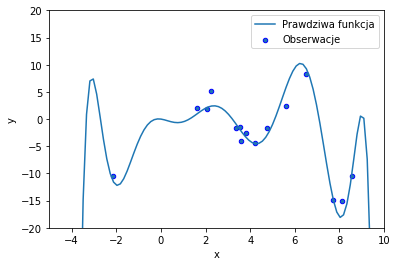

In [11]:
X, y = get_data_poly10()
plot_poly10(X, y)

Zwróć uwagę, że do rysowania używamy teraz funkcji `plot_poly10`. Zaimplementuj opisane podejścia dwóch badaczy i porównaj ich błąd kwadratowy (pojawia się on w tytule wykresu `plot_poly10(X ,y, regresor, stopeń_wielomianu)`).

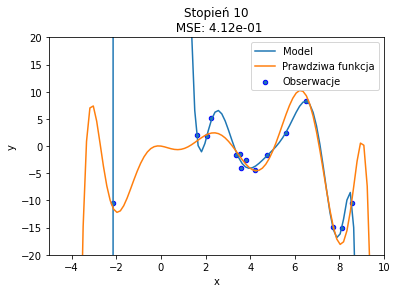

In [12]:
# YOUR CODE HERE
plot_poly10(X, y, create_pipeline(X, y, 10), 10)

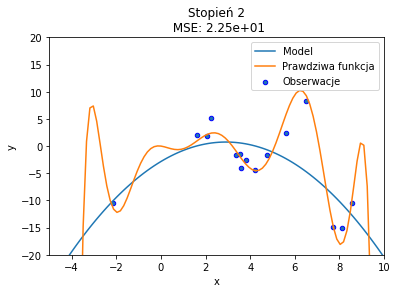

In [13]:
plot_poly10(X, y, create_pipeline(X, y, 2), 2)

Jak można się było spodziewać model pasujący do prawdziwej funkcji osiągnął niższy błąd na zbiorze uczącym. Co się jednak dzieje na zbiorze testowym? Używając funkcji
```
X_test, y_test = get_data_poly10(seed=1, n_samples=1000)
```
wygeneruj zbiór testowy (funkcja zaczyna generację od tego samego ziarna, aby obserwacje w zbiorze testowym nie pokrywały się ze zbiorem uczącym konieczna jest jego zmiana np. na wartość 1 jak w proponowanym wywołaniu). Do oceny  predykcji wykorzystaj funkcję `mean_squared_error`, której wywołanie jest identyczne jak wcześniej wykorzystywanej `accuracy_score` czyli `mean_squared_error(y_prawdziwe, y_przewidziane)`.

In [14]:
pipeline_10 = create_pipeline(X, y, 10)
pipeline_2 = create_pipeline(X, y, 2)
X_test, y_test = get_data_poly10(seed=1, n_samples=1000)
print('Accuracy (degree=2): ', mean_squared_error(y_test, pipeline_2.predict(X_test)))
print('Accuracy (degree=10): ', mean_squared_error(y_test, pipeline_10.predict(X_test)))

Accuracy (degree=2):  47.1204243984989
Accuracy (degree=10):  208624647.96662214


Zdroworozsądkowo powinniśmy wybrać poziom złożoności modelu uczenia maszynowego do złożoności modelowanej funkcji (złożoność problemu). W kontekście dekompozycji wariancja-obciążenie możemy to interpretować jako minimalizacje jedynie termu odpowiadającego za obciążenie. Takie myślenie zakłada, że wybór modelu z obciążeniem jest fundamentalnie złe, bo nie ma możliwości nauczenia się prawdziwej funkcji. Oczywiście, uważamy wariancję za coś niedobrego, ale przynajmniej średnio (po wszystkich możliwych próbkach) powinniśmy dostać idealny model. Czyli być może - średnio - powinniśmy też popełniać mały błąd, no i chociaż jest szansa że trafimy w prawdziwy model.

Takie myślenie jest fundamentalnie błędne. Model z dużą wariancją i małym obciążeniem może działać dobrze myśląc o populacji wszystkich możliwych próbek. W praktyce jednak (zwykle) mamy dostępny tylko jeden, konkretny zbiór danych i tego typu właściwości są irrelewantne. Jakość predykcyjna tworzonego modelu na danych zależy zarówno od obciążenia i wariancji które należy optymalizować jednocześnie, szukając dobrego przetargu. 

Powyższe ćwiczenie zostało wykonane na zbiorze uczącym posiadającym jedynie 15 obserwacji, więc może się wydawać, że uzyskane wyniki są nierealistyczne. Zwróć jednak uwagę, że w praktyce często modelujemy funkcje dużo bardziej złożone niż wielomian 10 stopnia, a także funkcje które są zaszumione w nieco bardziej złośliwy sposób niż szumem z rozkładu normalnego o $\sigma=2$. Ponadto uczony model ma tylko jedną zmienną przerabianą na 10 cech - w praktyce modele (w szczególności głębokie sieci neuronowe) mają znacznie więcej cech (klika rzędów wielkości więcej) co implikuje konieczność wykorzystania większej liczby obserwacji. Kończąc, w praktyce (prawie nigdy) nie znasz dokładnie postaci aproksymowanej funkcji. W szczególności może ona być różna od postaci zakładanej przez model (np. nie być wielomianem). 

Zbadaj efekt wariancja-obciążenie poprzez narysowanie wykresu trafność predykcji (MSE) na zbiorze testowym (oś y) vs rozmiar zbioru danych (od 2 do 50). Na wykresie zaznacz trafności regresji liniowej z cechami wielomianowymi stopnia 2, 10, 15 i 20. Dobrym pomysłem może być użycie skali logarytmicznej `plt.yscale("log")`.

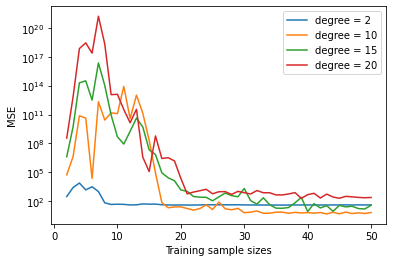

In [15]:
train_sizes = range(2, 51)
for i in [2, 10, 15, 20]:
    mse = []
    for j in train_sizes:
        X, y= get_data_poly10(n_samples=j)
        pipeline_i = create_pipeline(X, y, i)
        mse.append(mean_squared_error(y_test, pipeline_i.predict(X_test)))
    plt.plot(train_sizes, mse, label=f"degree = {i}")

plt.yscale('log')
plt.xlabel('Training sample sizes')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Ćwiczenia**
- Dla jakiego zakresu wielkości zbioru danych model z dwoma cechami ma lepszą trafność/MSE na zbiorze testowym?
- Dla każdego modelu przeanalizuj przebieg funkcji oraz postaraj się określić czy jakość modelu jest bardziej pogarszana przez jego wariancję czy obciążenie?
- Co można powiedzieć o trafności/MSE modeli (za bardzo) złożonych przy rosnącej wielkości danych? 
- Skomentuj zasadę "Dobieramy złożoność modelu do jakości danych a nie do problemu"

1. Dla zakresu 2-18 najprostszy model ma najmniejszy błąd.
2. Od 2-18 wariancja, w dalszym zakresie - obciążenie.
3. Przy rosnącej wielkości danych, trafność zbiega do tej samej wartości MSE co dla mniej złożonych model.
4. Nawet jeśli mamy wiedzę ekspercką o analizowanych danych, lepiej jest wybrać prostszy model dla mniej licznych danych.

W praktyce oprócz powyższego wykresu możemy narysować dużo częściej stosowany wykres błąd (oś y) vs złożoność modelu (oś x). W tym ćwiczeniu złożoność modelu regresji liniowej będzie reprezentowana przez stopień wielomianowych cech która jest przez nią używana (liczba ta +1 jest liczbą parametrów modelu). Wygeneruj 50-elementowy zbiór uczący i sprawdź modele z cechami stopnia od 1 do 25. Narysuj wykres zaznaczając zarówno MSE na zbiorze uczącym jak i testowym.

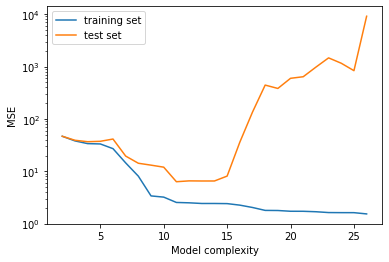

In [16]:
degrees = range(1, 26)
X, y = get_data_poly10(n_samples=50)
mse_train = []
mse_test = []
for i in degrees:
    # Change after second dot below in create_pipeline function - add normalize LinearRegression feature
    pipeline_i = create_pipeline(X, y, i, True)
    mse_train.append(mean_squared_error(y, pipeline_i.predict(X)))
    mse_test.append(mean_squared_error(y_test, pipeline_i.predict(X_test)))
plt.plot([degree + 1 for degree in degrees], mse_train, label='training set')
plt.plot([degree + 1 for degree in degrees], mse_test, label='test set')
plt.yscale('log')
plt.ylabel('MSE')
plt.xlabel('Model complexity')
plt.legend()
plt.show()

Linie na powyższych wykresach czasami są nazywane krzywymi uczenia (ang. *learning curves*).

**Ćwiczenie**
- Czy z powyższego wykresu potrafiłbyś określić, który model jest najlepszy?
- Uzyskałeś prawdopodobnie dość nieintuicyjny wynik tj. dla bardziej złożonych modeli MSE na zbiorze treningowym zaczyna wzrastać. Jest to szokujące, bo skoro jest możliwe osiągnięcie niskiego błędu używając wielomianu 10 stopnia to z całą pewnością jest możliwe osiągnięcie tego samego wyniku wielomianem stopnia 20 -- po prostu poprzez wyzerowanie w procesie optymalizacji współczynników/wag dla kolejnych wielomianowych cech. Problem wynika to z braku normalizacji cech (dlaczego?), zastąp swój klasyfikator wywołaniem `LinearRegression(normalize=True)`. Jest to dla nas ważna lekcja *zawsze* rysujmy trafność zarówno zbioru testowego (rzeczywista jakość) jak i uczącego (diagnostyka procesu uczenia).

1. Dla niewielkich zbiorów danych przyjmujemy, że najlepszy model to tan najbardziej dopasowany do zbioru testowego. Z powyższego wykresu wynika, że jest to model dla którego stopień wielomianowych cech wynosi 10 (a złożoność czy też liczba parametrów - 11).

## Zadanie 4 - test set is all you need?

Studenci piszą kolokwium składające się z $M$ pytań testowych typu prawda/fałsz. Na kolokwium przyszło $N$ studentów i każdy z nich porzedniej nocy miał ciekawsze zajęcia niż nauka do kolokwium... więc kompletne strzelanie. Ile wynosi trafność najlepszego studenta? Odpowiedz przez symulację za $M$ przyjmij 10, a $N=100$. (Jeśli jest mało czasu - zastanów się nad odpowiedzią, bez symulacji)

best students score: 0.9
worst students score: 0.1


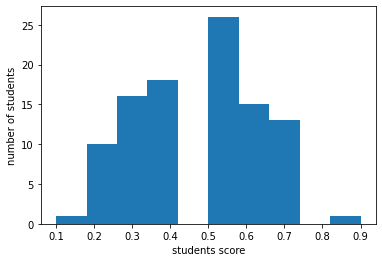

In [17]:
M = 10
N = 100
correct_answers = (np.random.rand(M) > 0.5).astype(int)
students_answers = np.array([(np.random.rand(M) > 0.5).astype(int) for _ in range(N)])
scores = np.mean(students_answers == correct_answers, axis=1)
plt.xlabel('students score')
plt.ylabel('number of students')
plt.hist(scores)
print(f"best students score: {np.max(scores)}")
print(f"worst students score: {np.min(scores)}")

Jakiej trafności tego studenta spodziewamy się na kolejnym teście? Podstaw twoją odpowiedź (liczbę) do zmiennej `kolejny_test=`



In [18]:
kolejny_test = 0.5

Ta sytuacja (niestety) odpowiada $N$ klasyfikatorom testowanym na tym samym $N$-elementowym zbiorze *testowym* i wybranie na tej podstawie ,,najlepszego z nich'', podczas gdy w rzeczywistości każdy z klasyfikatorów jest dokładnie taki sam (w sensie trafności na populacji). Wybierając najlepszy klasyfikator na podstawie wyniku na zbiorze testowym, być może i wybierasz najlepszy klasyfikator, ale twoja estymacja jego trafności jest zwyczajnie błędna (zwykle zawyżona). W ten sposób to ty sam przeuczasz swój klasyfikator! Pamiętaj: zbiór testowy jest nietykalny aż do ostatecznej (i jedynej) ewaluacji!



## Zadanie 5 - klasyfikatory generatywne a dyskryminacyjne
Na zajęciach porównywaliśmy klasyfikatory dyskryminacyjne z generatywnymi, a konkretnie ich parę Naiwny Bayes  i Regresja Logistyczna. Jednym z elementów porównania było to, że klasyfikator naiwnego Bayesa osiąga zwykle niższe trafności ale swoją najlepszą trafność osiąga już dla stosunkowo małych zbiorów danych (zbiega z logarytmem z rozmiaru danych). Regresja logistyczna ma lepszą trafność asymptotycznie, ale zbiega do niej wolniej (liniowo). 
Wykonaj eksperyment pokazujący te własności. 

Narysuj wykres na którego osiach będzie rozmiar zbioru uczącego (od 5 do 175 elementów np. z punktem rysowanym co 10 - w danych medycznych mały rozmiar zbioru danych jest niestety "typowy") vs trafność klasyfikatora na zbiorze testowym dla zbioru `breast_cancer` oraz klasyfikatorów `BernoulliNB` i `LogisticRegression`. Wyniki na wykresie uśrednij po co najmniej 50 losowych podziałach na zbiór uczący i testowy. Przypominam wywołanie dzielące zbiór na część testową i uczącą:
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
```

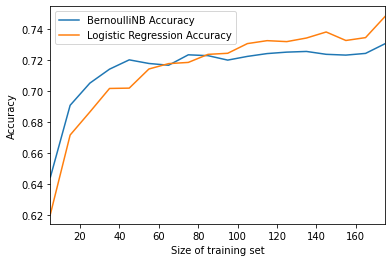

In [24]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def count_accuracy(Classifier, X, y, train_size):
    y_train = []
    while len(np.unique(y_train)) < 2:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
    classifier = Classifier()
    classifier.fit(X_train, y_train)
    return accuracy_score(y_test, classifier.predict(X_test))


X,y = get_breast_cancer()

train_sizes = range(5, 176, 10)
bernoulli_accuracy = []
logistic_accuracy = []

classifier_types = [(bernoulli_accuracy, BernoulliNB), (logistic_accuracy, LogisticRegression)]
split_number = 100
points = []

for size in train_sizes:
    points.append(size)
    for accuracy, ClassifierType in classifier_types:
        accuracy.append(np.mean([count_accuracy(ClassifierType, X, y, size) for _ in range(split_number)]))

plt.plot(points, bernoulli_accuracy, label='BernoulliNB Accuracy')
plt.plot(points, logistic_accuracy, label='Logistic Regression Accuracy')
plt.xlim(5, 175)
plt.ylabel('Accuracy')
plt.xlabel('Size of training set')
plt.legend()
plt.show()

**Zadanie**
- Spróbuj zaklasyfikować zbiór `breast_cancer` klasyfikatorem najbliższego sąsiada. 
- Wybierz $k$ rysując odpowiednią krzywą uczenia.
- Po sporządzeniu odpowiedniego wykresu sprawdź czy potrafisz określić sytuacje w której klasyfikator ciepi z powodu zbyt dużej wariancji i z powodu zbyt dużego obciążenia.

Zadanie nie będzie sprawdzane.